# DeepCoord Quick Start

With this notebook, you can get started with DeepCoord quickly.

You will set up and run DeepCoord, observe its training curves over time, and analyze some results.

Please note that this is just meant to get you started - you will likely have to adjust and extend this code to achieve what you want.


## Set up and Test DeepCoord

In [3]:
# clone and install deepcoord --> skip this if you already installed deepcoord
!git clone https://github.com/RealVNF/DeepCoord.git

%cd DeepCoord
!pip install -r requirements.txt

In [7]:
# ensure deepcoord is installed properly
# ignore TensorFlow warnings --> should show available CLI options at the end
!deepcoord -h

Using TensorFlow backend.
/mnt/c/Users/Stefan/git-repos/work/swc/DeepCoord/venv-wsl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/mnt/c/Users/Stefan/git-repos/work/swc/DeepCoord/venv-wsl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/mnt/c/Users/Stefan/git-repos/work/swc/DeepCoord/venv-wsl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  

## Run DeepCoord

Run DeepCoord with a small example, using the small example configurations in the `res` folder: `res/config/agent/sample_agent.yaml res/networks/sample_network.graphml res/service_functions/abc.yaml res/config/simulator/sample_config.yaml`

Just train for 10 training episodes, each with 200 steps, i.e., resulting in 2000 training steps.

`--append-test` runs one test iteration after finishing training, which collects the results for evalution (metrics are not written during training to save time and space). 
The results will be saved in the `results` folder (created automatically).

In [5]:
!deepcoord res/config/agent/sample_agent.yaml res/networks/sample_network.graphml res/service_functions/abc.yaml res/config/simulator/sample_config.yaml 10 --append-test

Using TensorFlow backend.
/mnt/c/Users/Stefan/git-repos/work/swc/DeepCoord/venv-wsl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/mnt/c/Users/Stefan/git-repos/work/swc/DeepCoord/venv-wsl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/mnt/c/Users/Stefan/git-repos/work/swc/DeepCoord/venv-wsl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  


**Important:** Make note of the path where the results are stored, eg:

```
2021-12-01 14:13:39,325 - root - INFO - FINISHED TEST
2021-12-01 14:13:39,326 - root - INFO - writing result to file: ./results/sample_agent/sample_network/abc/sample_config/2021-12-01_14-11-24_seed2871/test-2021-12-01_14-11-24_seed2871/result.yaml
2021-12-01 14:13:39,343 - root - INFO - See ./results/sample_agent/sample_network/abc/sample_config/2021-12-01_14-11-24_seed2871/test-2021-12-01_14-11-24_seed2871/test.log for INFO log output.
```

You will need the path of the test result later, here `./results/sample_agent/sample_network/abc/sample_config/2021-12-01_14-11-24_seed2871/test-2021-12-01_14-11-24_seed2871/result.yaml`


## Monitor Training Progress on TensorBoard

While DeepCoord is training, you can monitor its progress and view its learning curves on TensorBoard.

DeepCoord saves TensorBoard-related graph files in the `graph` directory, which is created automatically, when you run DeepCoord.

To run TensorBoard, simply run `tensorboard --logdir graph` in a separate terminal and open your browser at [localhost:6006](localhost:6006) (recommended).
When looking at the episode reward, you can see that it grows quickly at the beginning and then starts to converge after some training.

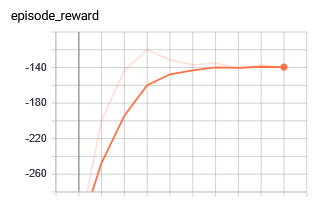

Alternatively, you can also run TensorBoard in a Jupyter notebook:

In [ ]:
# resolve issues with Google CoLab: https://github.com/tensorflow/tensorboard/issues/3549#issuecomment-627298300
!pip uninstall -y tensorboard-plugin-wit

In [10]:
%load_ext tensorboard

# this prints tons of warnings and errors, but should still show tensorboard;
# sometimes it also shows nothing
# in this case just try running it from your terminal
%tensorboard --logdir graph

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 2460), started 0:06:02 ago. (Use '!kill 2460' to kill it.)

invalid info file: '/tmp/.tensorboard-info/pid-1164.info'
Traceback (most recent call last):
  File "/mnt/c/Users/Stefan/git-repos/work/swc/DeepCoord/venv-wsl/lib/python3.6/site-packages/tensorboard/manager.py", line 316, in get_all
    info = _info_from_string(contents)
  File "/mnt/c/Users/Stefan/git-repos/work/swc/DeepCoord/venv-wsl/lib/python3.6/site-packages/tensorboard/manager.py", line 155, in _info_from_string
    raise ValueError("incompatible version: %r" % (json_value,))
ValueError: incompatible version: {'cache_key': 'eyJhcmd1bWVudHMiOlsiLS1sb2dkaXIiLCJyZXN1bHRzL1BQTy8iXSwiY29uZmlndXJlX2t3YXJncyI6e30sIndvcmtpbmdfZGlyZWN0b3J5IjoiL21udC9jL1VzZXJzL1N0ZWZhbi9naXQtcmVwb3Mvd29yay9kZWVwLXJsLW1vYmlsaXR5LW1hbmFnZW1lbnQifQ==', 'db': '', 'logdir': 'results/PPO/', 'path_prefix': '', 'pid': 1164, 'port': 6006, 'start_time': 1596633283, 'version': '2.2.2'}
invalid info file: '/tmp/.tensorboard-info/pid-1164.info'
Traceback (most recent call last):
  File "/mnt/c/Users/Stefan/git-repos/wo

## Analyze Results

To further analyzte the results, you can plot them.

Here are some simple options, but you can do a lot more - depending on what you want to evaluate.

In [12]:
import os
import pandas as pd

# YOU NEED TO CHANGE THIS: copy the result path from above - without the trailing "result.yaml"
test_result_dir = "results/sample_agent/sample_network/abc/sample_config/2021-12-01_14-11-24_seed2871/test-2021-12-01_14-11-24_seed2871"
test_result_dir = # YOUR TEST RESULT DIR HERE

# read test results into pandas data frame
test_results = os.path.join(test_result_dir, "metrics.csv")
df = pd.read_csv(test_results)

df.head()

,episode,time,total_flows,successful_flows,dropped_flows,in_network_flows,avg_end2end_delay
0,1,0,1,0,0,1,0.0
1,1,100,10,6,0,4,45.0
2,1,200,20,16,0,4,45.0
3,1,300,30,26,0,4,45.0
4,1,400,40,36,0,4,45.0


In [17]:
# let's add a column with the percentage of successful flows (in [0,100]%)
df["success_perc"] = 100 * df["successful_flows"] / df["total_flows"]

df.head()

,episode,time,total_flows,successful_flows,dropped_flows,in_network_flows,avg_end2end_delay,success_perc
0,1,0,1,0,0,1,0.0,0.000000
1,1,100,10,6,0,4,45.0,60.000000
2,1,200,20,16,0,4,45.0,80.000000
3,1,300,30,26,0,4,45.0,86.666667
4,1,400,40,36,0,4,45.0,90.000000


Text(0.5, 1.0, 'Percentage of Successful Flows over Time')

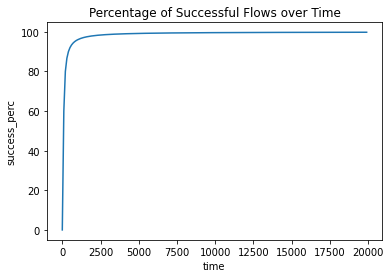

In [18]:
import seaborn as sns

ax = sns.lineplot(x=df["time"], y=df["success_perc"])
ax.set_title("Percentage of Successful Flows over Time")

Here, the scenario starts with 0 flows (thus 0 successful flows) and then quickly converges to almost 100% successful flows.

Let's look at the end-to-end delay of these flows.

Text(0.5, 1.0, 'Avg. End-to-end Delay of Flows over Time')

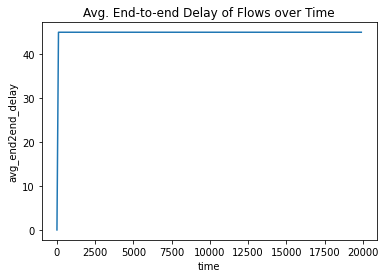

In [19]:
ax = sns.lineplot(x=df["time"], y=df["avg_end2end_delay"])
ax.set_title("Avg. End-to-end Delay of Flows over Time")

Since the scenario is very static, the end-to-end delay stays at a short, constant value.